### Background

### Company: E-Shop Pro

#### Industry: E-Commerce

E-Shop Pro is a leading online retailer offering a wide range of products, including electronics, apparel, and home goods. With millions of customers globally, the business prides itself on its fast delivery, customer-centric policies, and personalized shopping experience. Some major achievements highlighted by the company include:
* Growth in user base by 30% annually over the last five years.
* Implementation of a personalized recommendation system, improving customer satisfaction.
* Achieved 80% retention rate among VIP customers in the first two years of loyalty program implementation.

Despite its numerous successes, the company has encountered a formidable challenge that has left its leadership team determined to find a solution: an alarmingly high shopping cart abandonment rate.


### Business Problem

The company is facing a significant challenge in retaining customers over time. While the company experiences high customer acquisition rates, they are seeing a drop-off in returning customers after the first purchase. Specific challenges include:
    
* Declining repeat purchase rate: New customers are not returning after their initial purchase.
* Customer churn: A noticeable percentage of customers leave after a brief period of activity, increasing marketing and acquisition costs.
* Low engagement: Customers show decreased interaction with the platform after their first few visits, indicating a failure to maintain long-term interest.
    
Resolving these issues is critical for improving customer lifetime value (CLV) and overall business growth.


### Objective of the Project

* Implement Cohort analysis to understand Customer Retention Rate
* Identify Retention Trends: To identify trends and patterns in customer retention within each cohort. 
* Churn Analysis: To pinpolint the reason and timing of customer churn within various cohorts. And build a predictive model that can be used to predict churn behavior.
* Recommendation Strategies: To develop data-driven strategies and recommendations for improving customer retention based on the insights gained from the cohort analysis.
* Carry out a segmentation analysis to understand Purchasing behaviour of the customers.
* Implement Version Control using Git and GitHub

#### Data Dictionary

The dataset required for this project will include:
InvoiceNo: A unique identifier for each invoice or transaction, often used for tracking and reference purposes.

StockCode: A code or identifier associated with a specific product or item in the e-commerce store's inventory, used for cataloging and tracking purposes.

Description: A categorical feature that provides a brief textual description of the product or item being sold, offering clarity to customers about what they are purchasing.

Quantity: The quantity or number of units of a product that were included in the transaction, indicating the purchase volume for each item.

InvoiceDate: The date and time when the transaction or invoice was generated, offering insights into when purchases were made and allowing for temporal analysis.

UnitPrice: Indicating the total cost of the items purchased.

CustomerID: A unique identifier associated with each customer or shopper, allowing for customer-specific analysis and tracking of individual purchasing behavior.

Country: The name of the country where the customer is located or where the transaction occurred.



### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

### Load dataset

In [2]:
data = pd.read_csv("dataset_ecommerce.csv")

In [3]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [4]:
# Descriptive stat
data.describe(include="all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [5]:
#Checking for missing values
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [6]:
#Drop missing values
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [8]:
#Checking for info on the dataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [9]:
# Convert to datetime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

### EXPLORATORY DATA ANALYSIS

#### Analysis by country

In [10]:
quantity_by_country = data.groupby(["Country"])["Quantity"].sum()

In [11]:
quantity_by_country

Country
Algeria          736181
Benin            738133
Burkina Faso     728332
Cameroon         730881
Cote d'Ivoire    740229
Egypt            729299
Ethiopia         732940
Ghana            735354
Kenya            732247
Libya            739206
Madagascar       726297
Mali             732358
Morocco          732594
Mozambique       735416
Niger            725841
Nigeria          739708
Rwanda           733511
Senegal          733968
Sierra Leone     735477
Somalia          736219
South Africa     740589
Sudan            734158
Tanzania         725664
Togo             741223
Tunisia          733082
Uganda           724525
Zambia           725152
Zimbabwe         737522
Name: Quantity, dtype: int64

In [12]:
# Create dataFrame
quantity_by_country = data.groupby(["Country"])["Quantity"].sum().reset_index()

In [13]:
quantity_by_country

,Country,Quantity
0,Algeria,736181
1,Benin,738133
2,Burkina Faso,728332
3,Cameroon,730881
4,Cote d'Ivoire,740229
5,Egypt,729299
6,Ethiopia,732940
7,Ghana,735354
8,Kenya,732247
9,Libya,739206


In [15]:
quantity_by_country

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206
5,1,Benin,738133
6,27,Zimbabwe,737522
7,19,Somalia,736219
8,0,Algeria,736181
9,18,Sierra Leone,735477


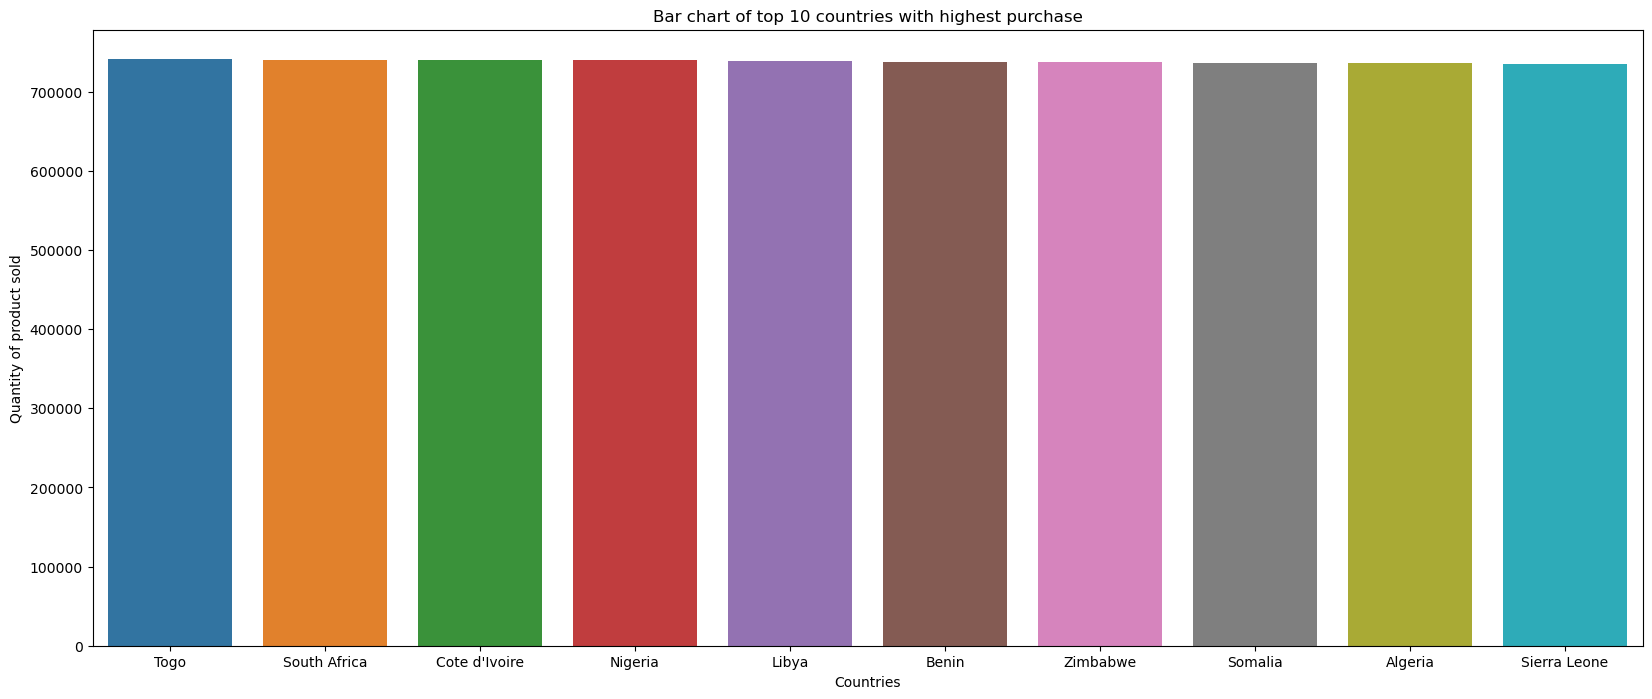

In [16]:
# Visualize the top 10 country where the most products are sold
top_10_country = quantity_by_country.head(10)

plt.figure(figsize = (20,8))
ax = sns.barplot(x = "Country", y= "Quantity", data =top_10_country)

plt.xlabel("Countries")
plt.ylabel("Quantity of product sold")
plt.title("Bar chart of top 10 countries with highest purchase")
plt.show()

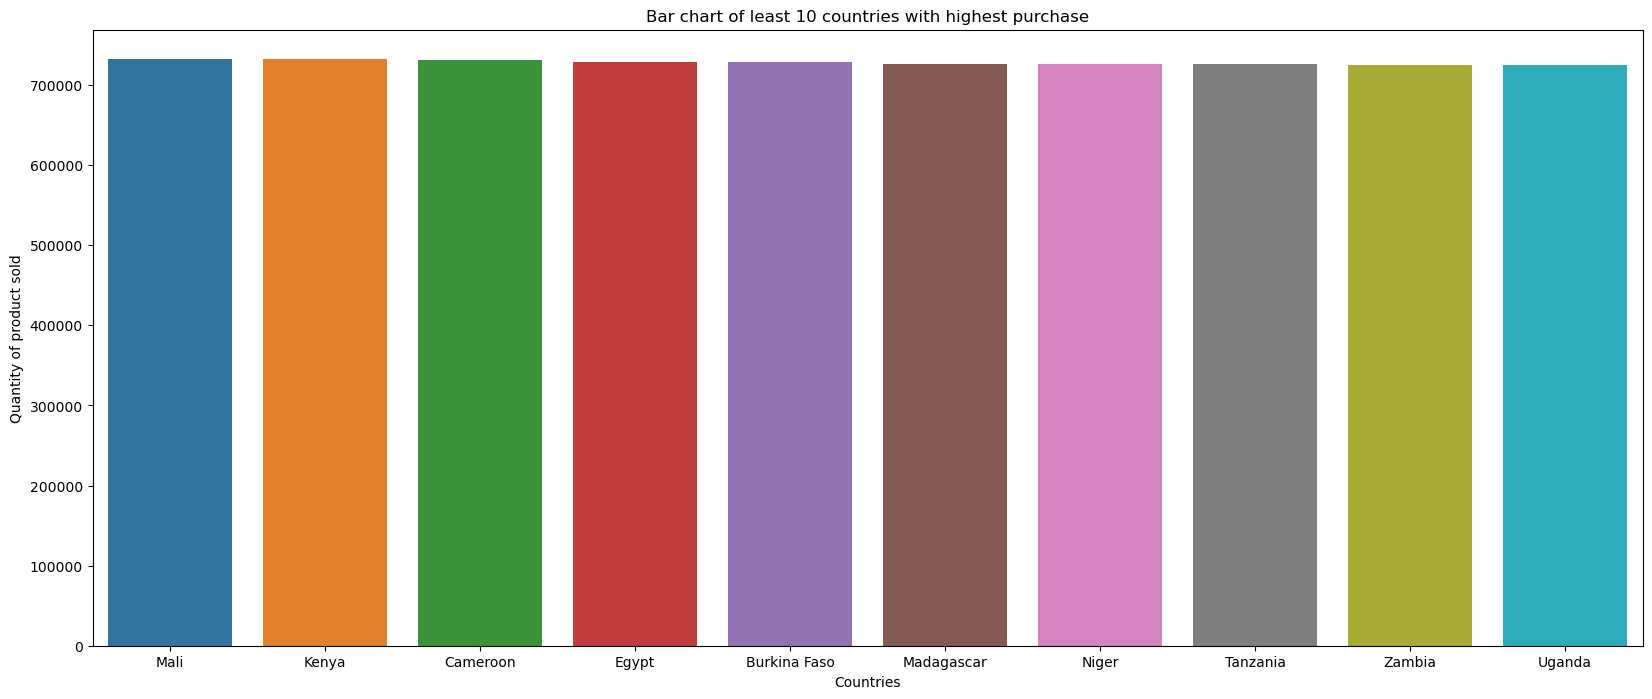

In [17]:
# Visualize the top 10 country where the least products are sold
least_10_country = quantity_by_country.tail(10)

plt.figure(figsize = (20,8))
ax = sns.barplot(x = "Country", y= "Quantity", data = least_10_country)

plt.xlabel("Countries")
plt.ylabel("Quantity of product sold")
plt.title("Bar chart of least 10 countries with highest purchase")
plt.show()

#### Analysis of countries with customers

In [18]:
country_to_customer = data.groupby(["Country"])["CustomerID"].nunique().reset_index()

In [19]:
country_to_customer

,Country,CustomerID
0,Algeria,3043
1,Benin,3054
2,Burkina Faso,3049
3,Cameroon,3029
4,Cote d'Ivoire,3026
5,Egypt,3029
6,Ethiopia,3035
7,Ghana,3035
8,Kenya,3009
9,Libya,3030


In [20]:
#Arrange in ascending order
country_to_customer = country_to_customer.sort_values("CustomerID", ascending =False).reset_index()

In [21]:
country_to_customer.head(3)

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053


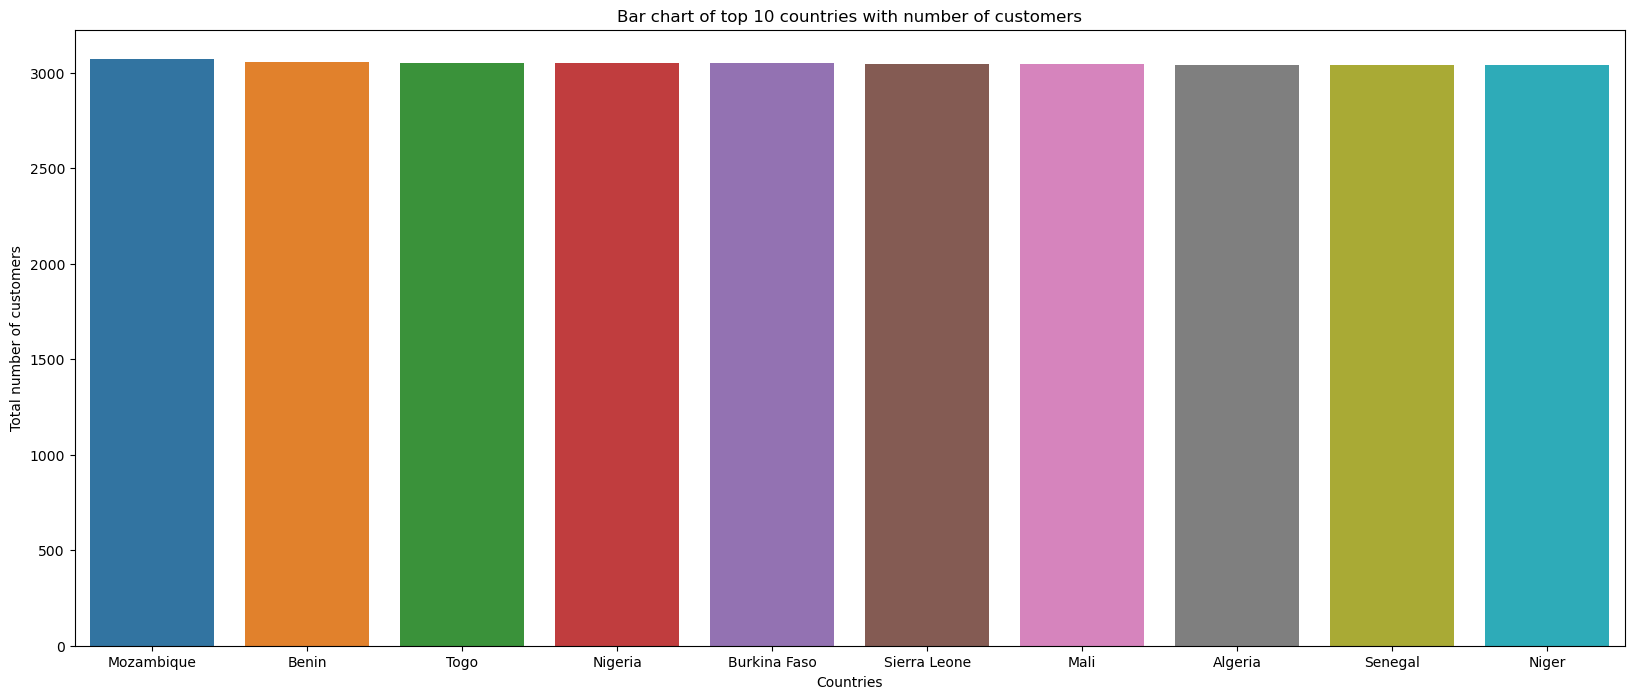

In [22]:
# Draw a plot of top 10 countries with most number of customers
top_countries_to_customer = country_to_customer.head(10)

plt.figure(figsize = (20,8))
ax = sns.barplot(x = "Country", y= "CustomerID", data = top_countries_to_customer)

plt.xlabel("Countries")
plt.ylabel("Total number of customers")
plt.title("Bar chart of top 10 countries with number of customers")
plt.show()

#### Sales Trend Visualization

In [23]:
monthly_sales = data.groupby(data["InvoiceDate"].dt.to_period('M'))["Quantity"].sum()

In [24]:
monthly_sales

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64

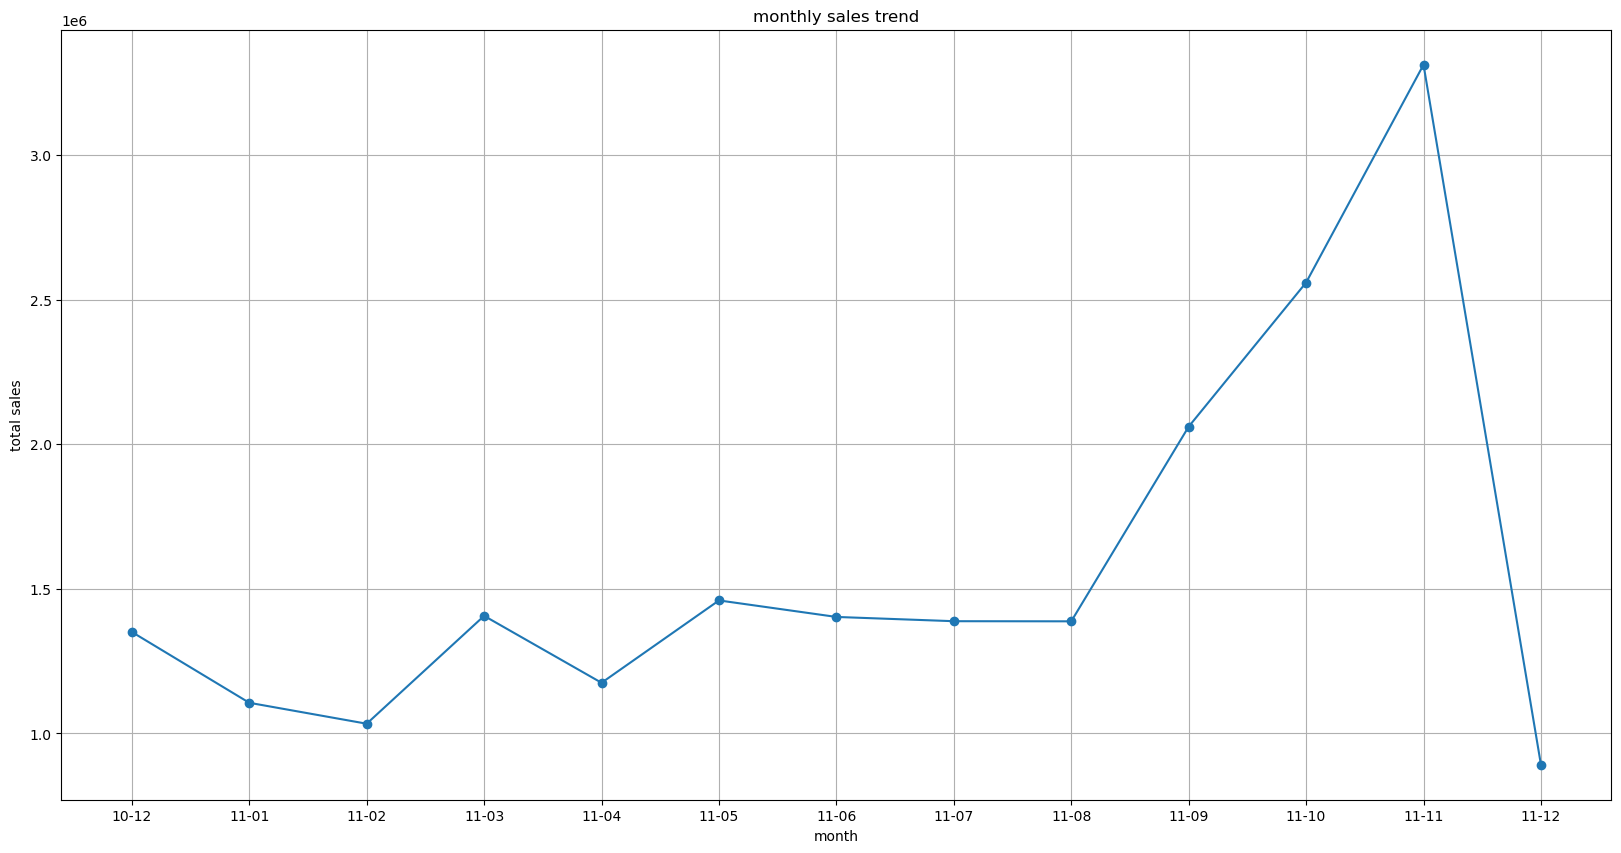

In [25]:
# Create a line plot
plt.figure(figsize = (20, 10))
plt.plot(monthly_sales.index.strftime("%y-%m"), monthly_sales.values, marker = 'o', linestyle = '-')
plt.xlabel("month")
plt.ylabel("total sales")
plt.title("monthly sales trend")
plt.grid(True)
plt.show()

### Observation

#### The graph shows a significant drops in total sales towards the end of the year 2011

### Cohort Analysis for Assessing customer Retention

Cohort analysis involves grouping customers based on shared experiences during a specific time frame, such as the date of their first purchase, signup, or activity. The goal is to understand behavior patterns over time within each cohort.

In [26]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [27]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [28]:
data["InvoiceDate"] = data["InvoiceDate"].apply(get_month)

In [29]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [30]:
# To know the date each customer made their first purchase
def get_cohort_date(data):
    data["cohort date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min")
    return data["cohort date"]

In [31]:
data["cohort date"] = get_cohort_date(data)

In [32]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


### Cohort Index

In [33]:
def get_year_and_month(data, col):
    month = data[col].dt.month
    year = data[col].dt.year
    return month, year

In [34]:
first_month, first_year = get_year_and_month(data, "cohort date")

In [35]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort date, Length: 406829, dtype: int64

In [36]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort date, Length: 406829, dtype: int64

In [37]:
latest_month, latest_year = get_year_and_month(data, "InvoiceDate")

In [38]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int64

In [39]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int64

### Calculate the Cohort Index

In [40]:
def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff*12 + month_diff +1
    return index

In [41]:
data["cohort_index"] = create_cohort_index(first_month, first_year,latest_month, latest_year)

In [42]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


### Cohort Table

In [43]:
cohort_info = data.groupby(["cohort date", 'cohort_index'])["CustomerID"].nunique().reset_index()

In [44]:
cohort_info

,cohort date,cohort_index,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [45]:
# change the customer ID to number of customer
cohort_info.rename(columns = {"CustomerID": "Number of customers"}, inplace = True)

In [46]:
cohort_info

,cohort date,cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [47]:
cohort_table = cohort_info.pivot(index = "cohort date", columns= ["cohort_index"], values = "Number of customers")

In [48]:
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
cohort_table.index = cohort_table.index.strftime("%B %Y")

In [50]:
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation

<Axes: xlabel='cohort_index', ylabel='cohort date'>

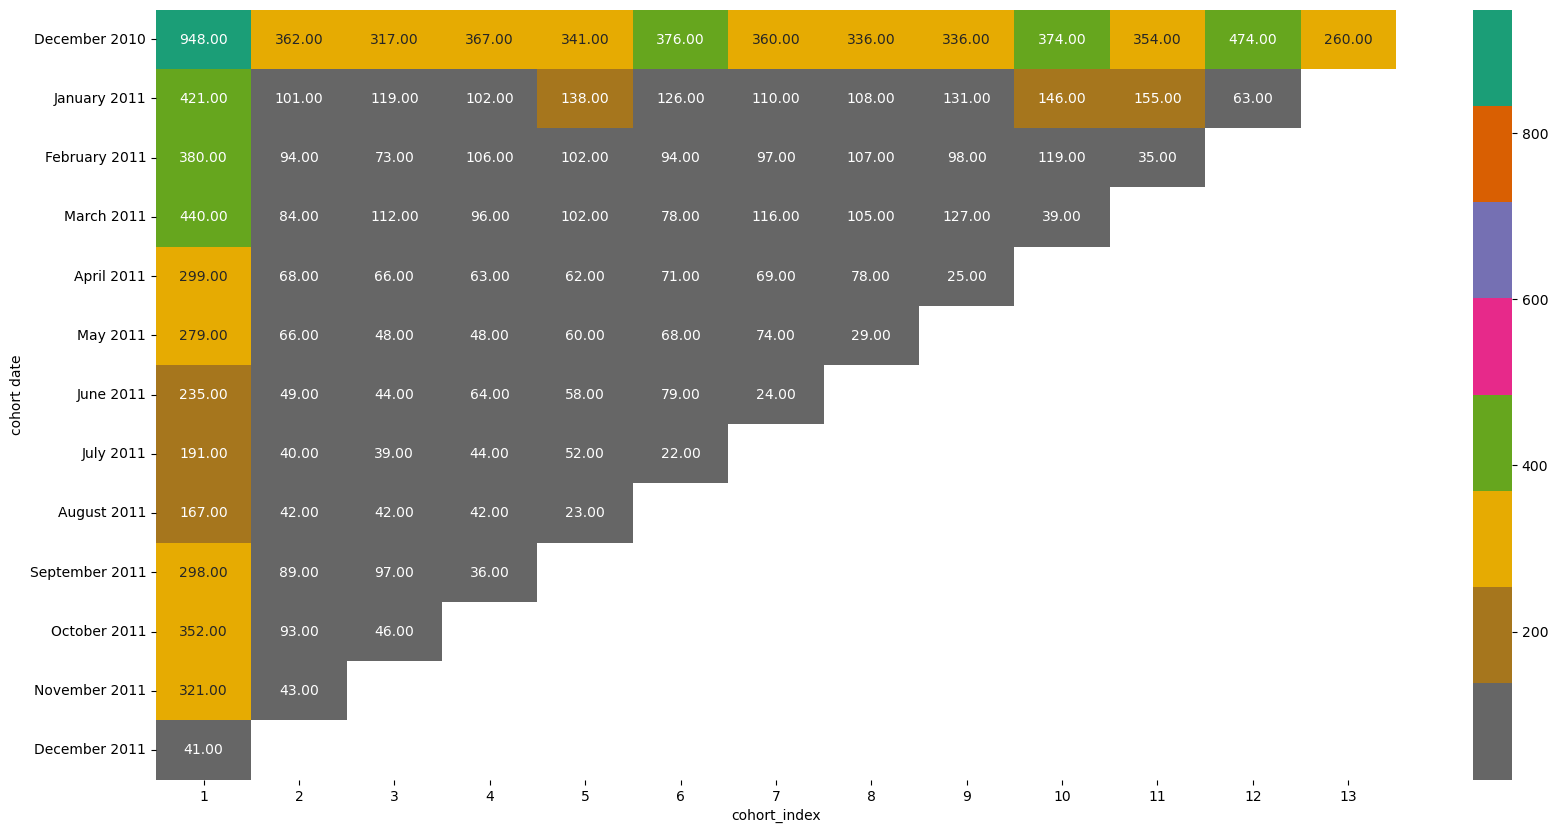

In [51]:
plt.figure(figsize = (20,10))
sns.heatmap(cohort_table, annot = True, cmap= "Dark2_r", fmt = ".2f")

In [52]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis =0)

In [53]:
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

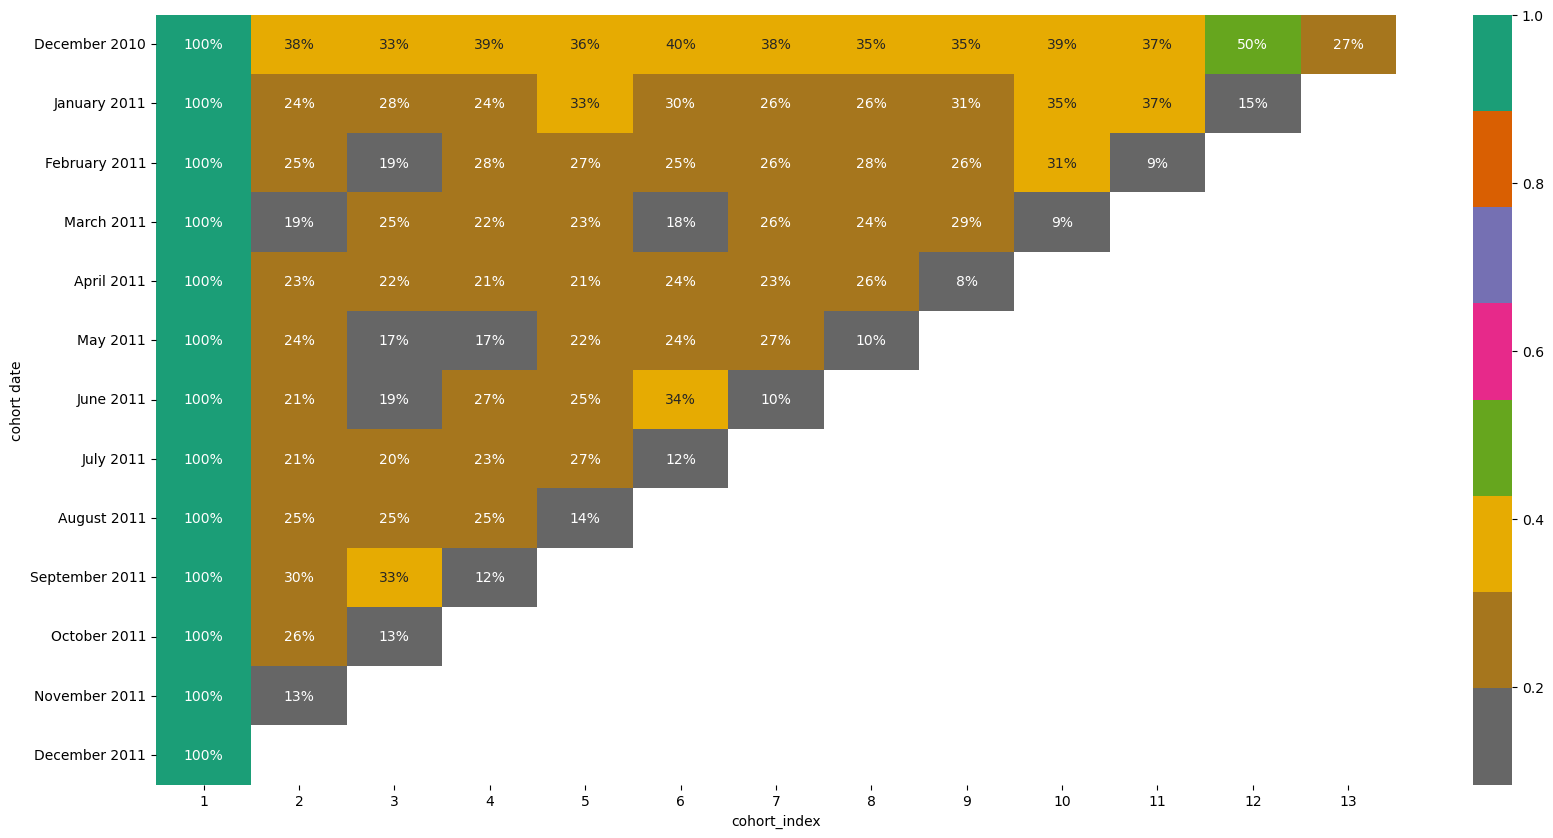

In [54]:
plt.figure(figsize = (20,10))
sns.heatmap(new_cohort_table, annot = True, cmap = "Dark2_r", fmt =".0%")

### Observation

Customer Retention Rates: The retention rate starts at 100% for all cohorts in month 1 (Cohort index = 1), as that is when the cohort was formed. Over time the retention rate decrfeases, reflecting customer churn

### Quantity bought by each cohort

In [55]:
quantity_bought = data.groupby(["cohort date", "cohort_index"])["Quantity"].sum().reset_index()

In [56]:
quantity_bought

,cohort date,cohort_index,Quantity
0,2010-12-01,1,1350834
1,2010-12-01,2,546873
2,2010-12-01,3,462374
3,2010-12-01,4,613244
4,2010-12-01,5,510943
...,...,...,...
86,2011-10-01,2,181888
87,2011-10-01,3,44776
88,2011-11-01,1,574330
89,2011-11-01,2,56021


In [57]:
quantity_table = quantity_bought.pivot(index = "cohort date", columns = ["cohort_index"], values = "Quantity")

In [58]:
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
2010-12-01,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
2011-01-01,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
2011-02-01,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
2011-03-01,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
2011-04-01,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
2011-05-01,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
quantity_table.index = quantity_table.index.strftime("%B %Y")

In [60]:
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
January 2011,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
February 2011,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
March 2011,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
April 2011,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
May 2011,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
June 2011,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation 

Each value is the total revenue (monetary value) generated by the cohort in the corresponding month. for instance the DFecember 2010 cohort generated 1,350,834 in revenue during their first month (cohort index 1). In the second month (Cohort index 2) they generated 546,873 in revenue.

<Axes: xlabel='cohort_index', ylabel='cohort date'>

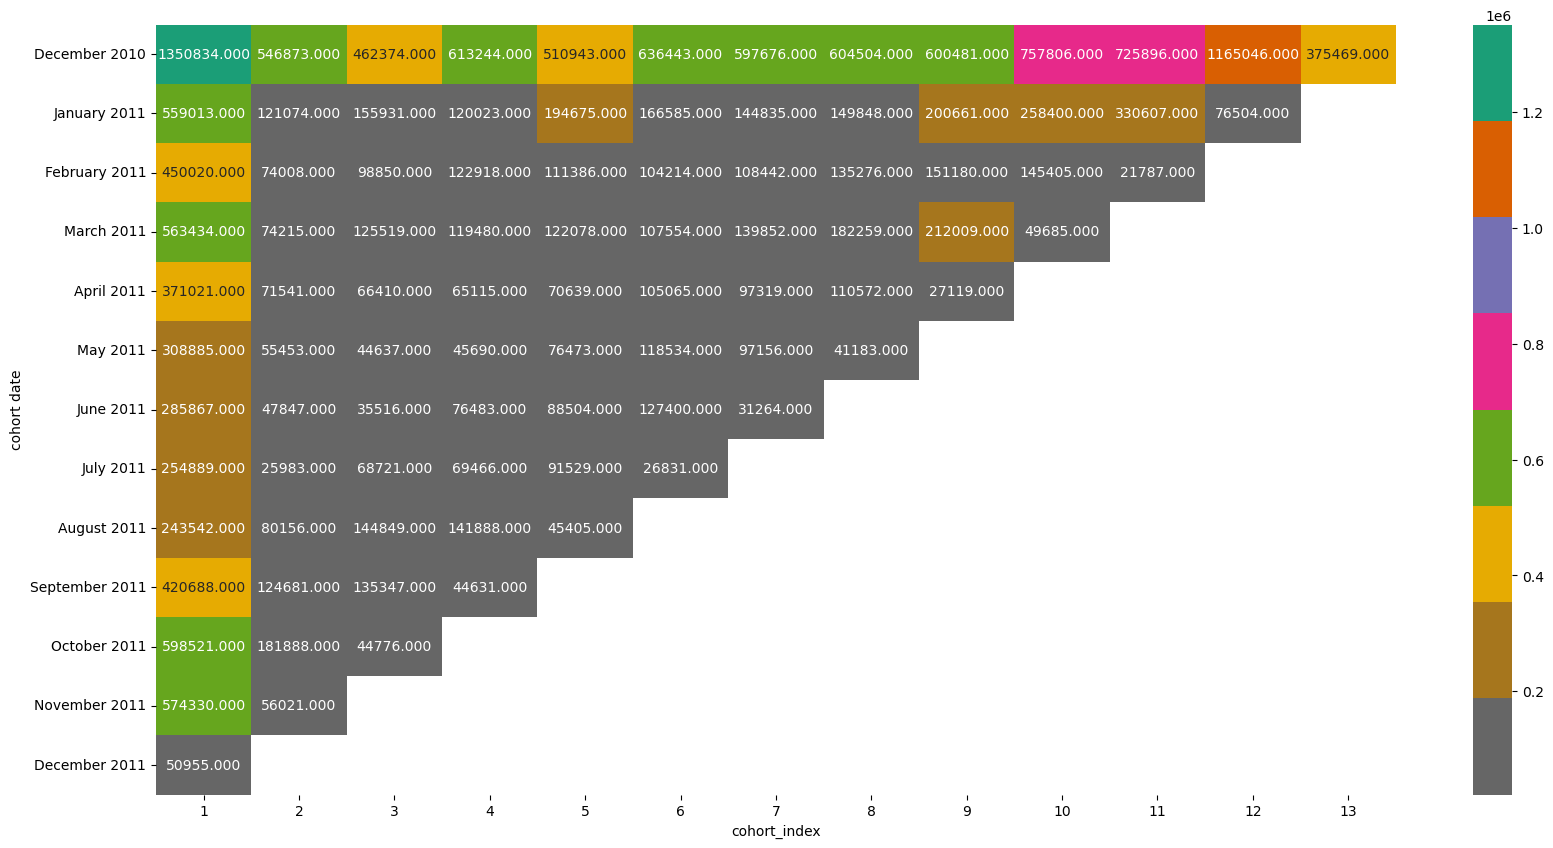

In [61]:
plt.figure(figsize = (20,10))
sns.heatmap(quantity_table, annot = True, cmap = "Dark2_r", fmt=".3f")

### CHURN Analysis

In [62]:
data['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [63]:
data['InvoiceDate'].unique()

array(['2010-12-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2011-02-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [64]:
data['StockCode'].unique()

array(['SC1734', 'SC2088', 'SC3463', ..., 'SC2151', 'SC7366', 'SC6753'],
      dtype=object)

In [65]:
data['Country'].unique()

array(['Egypt', 'Mali', 'South Africa', 'Rwanda', 'Sierra Leone', 'Benin',
       'Burkina Faso', 'Nigeria', "Cote d'Ivoire", 'Somalia', 'Cameroon',
       'Tanzania', 'Sudan', 'Madagascar', 'Tunisia', 'Mozambique',
       'Zimbabwe', 'Uganda', 'Libya', 'Morocco', 'Ethiopia', 'Algeria',
       'Ghana', 'Niger', 'Togo', 'Kenya', 'Zambia', 'Senegal'],
      dtype=object)

In [66]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Lets write a function that will help create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variables.
# Let us see if this help us write faster and cleane code.

def histogram_boxplot(feature, figsize=(25,15), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (20,12))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid=2
                                          sharex = True, # x-axis will be shared among all subplots
                                          gridspec_kw = {"height_ratios": (.25, .75)},
                                          figsize = figsize
                                          )# Creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the the column.
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins, palatte="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2)# for histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') #Add median to the histogram

### Univariate Analysis for Numerical values

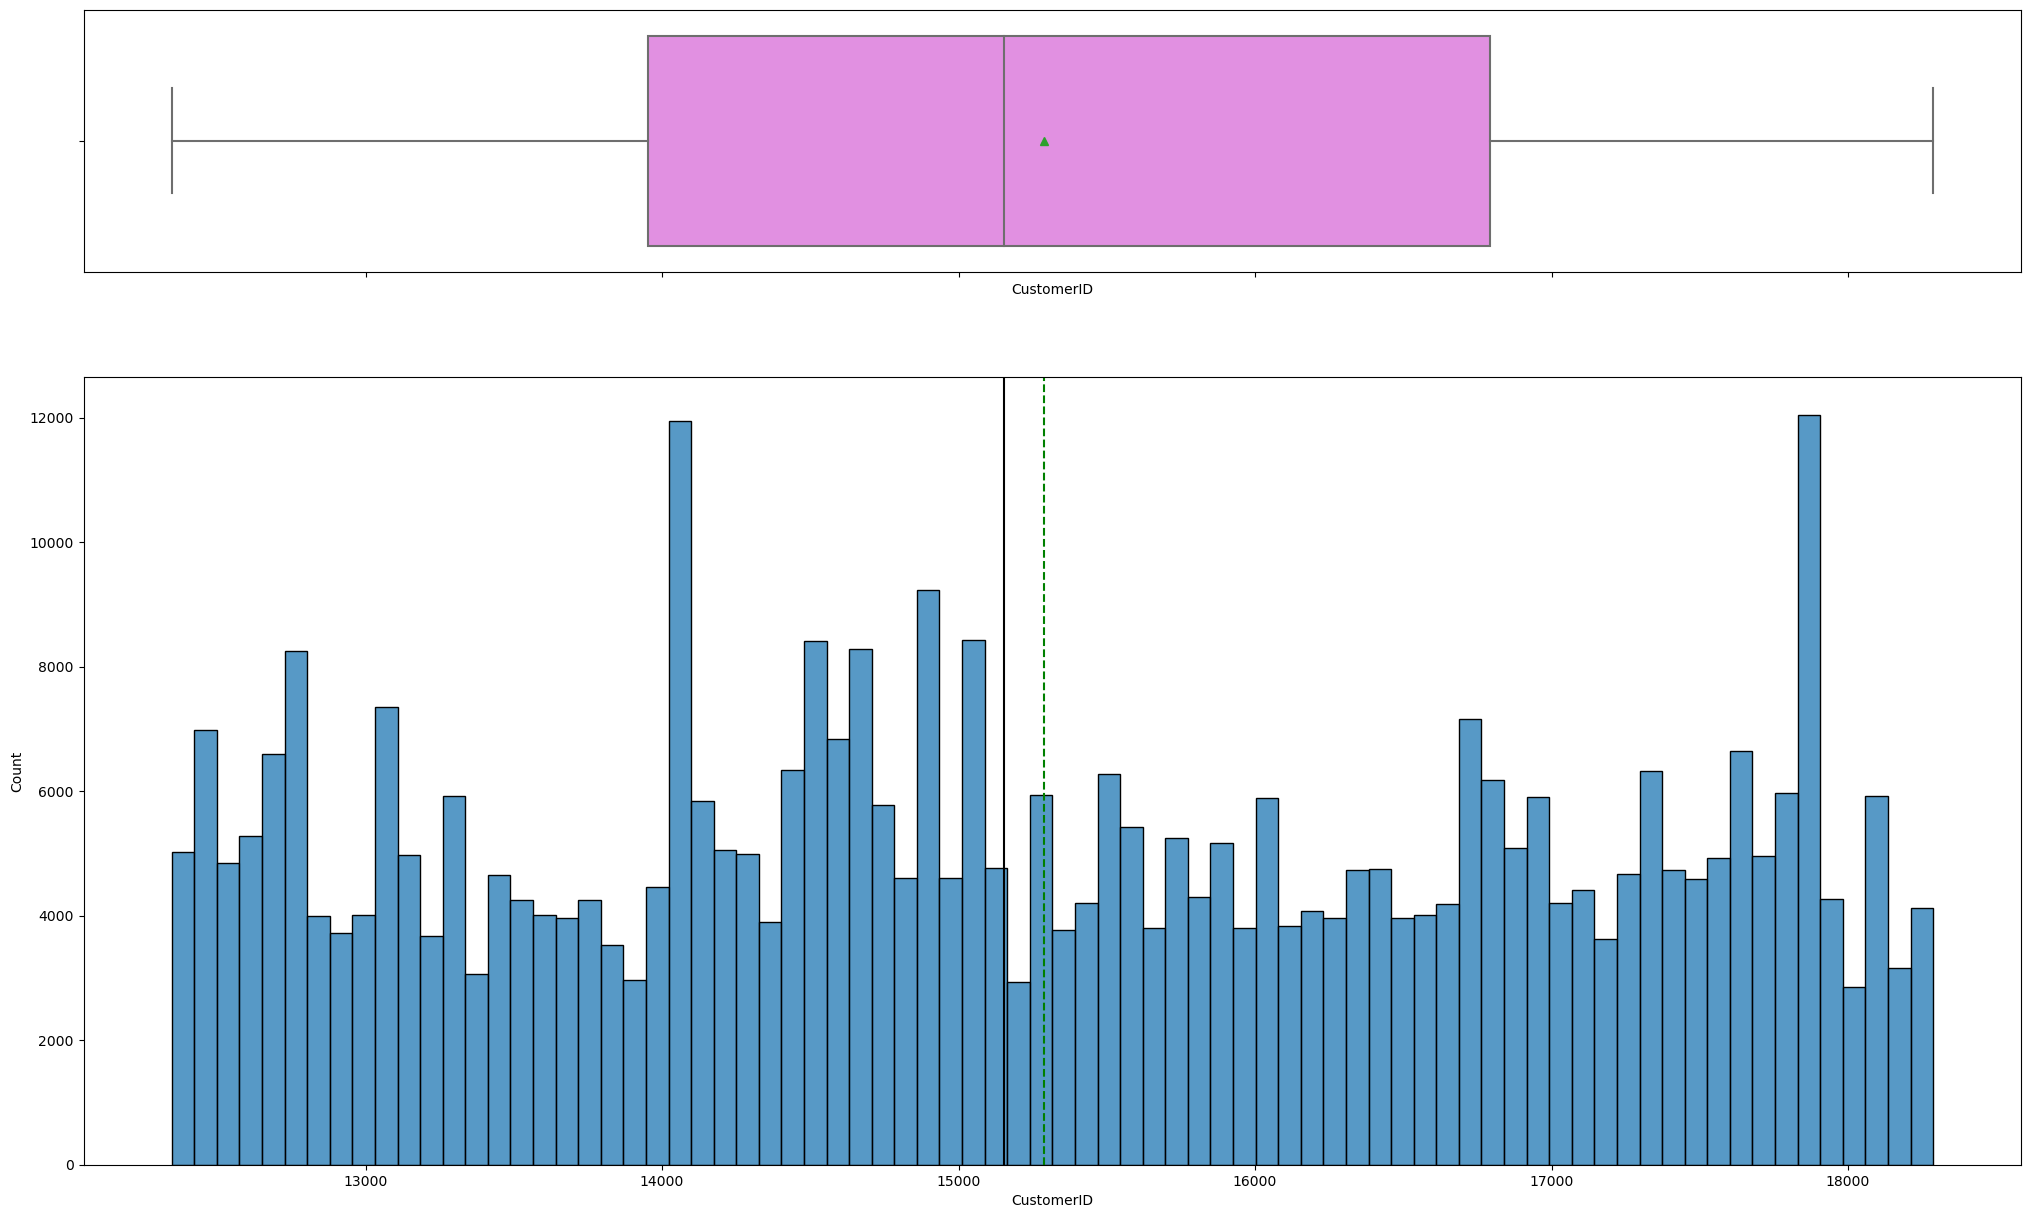

In [67]:
histogram_boxplot(data['CustomerID'])

In [68]:
data['CustomerID'].describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

### Observations

1. The CustomerID is uyniformly distributed with no outliers.
2. The range of CustomerID is between 12000 and 19000
3. 25% are within the 13946 to 13953 range

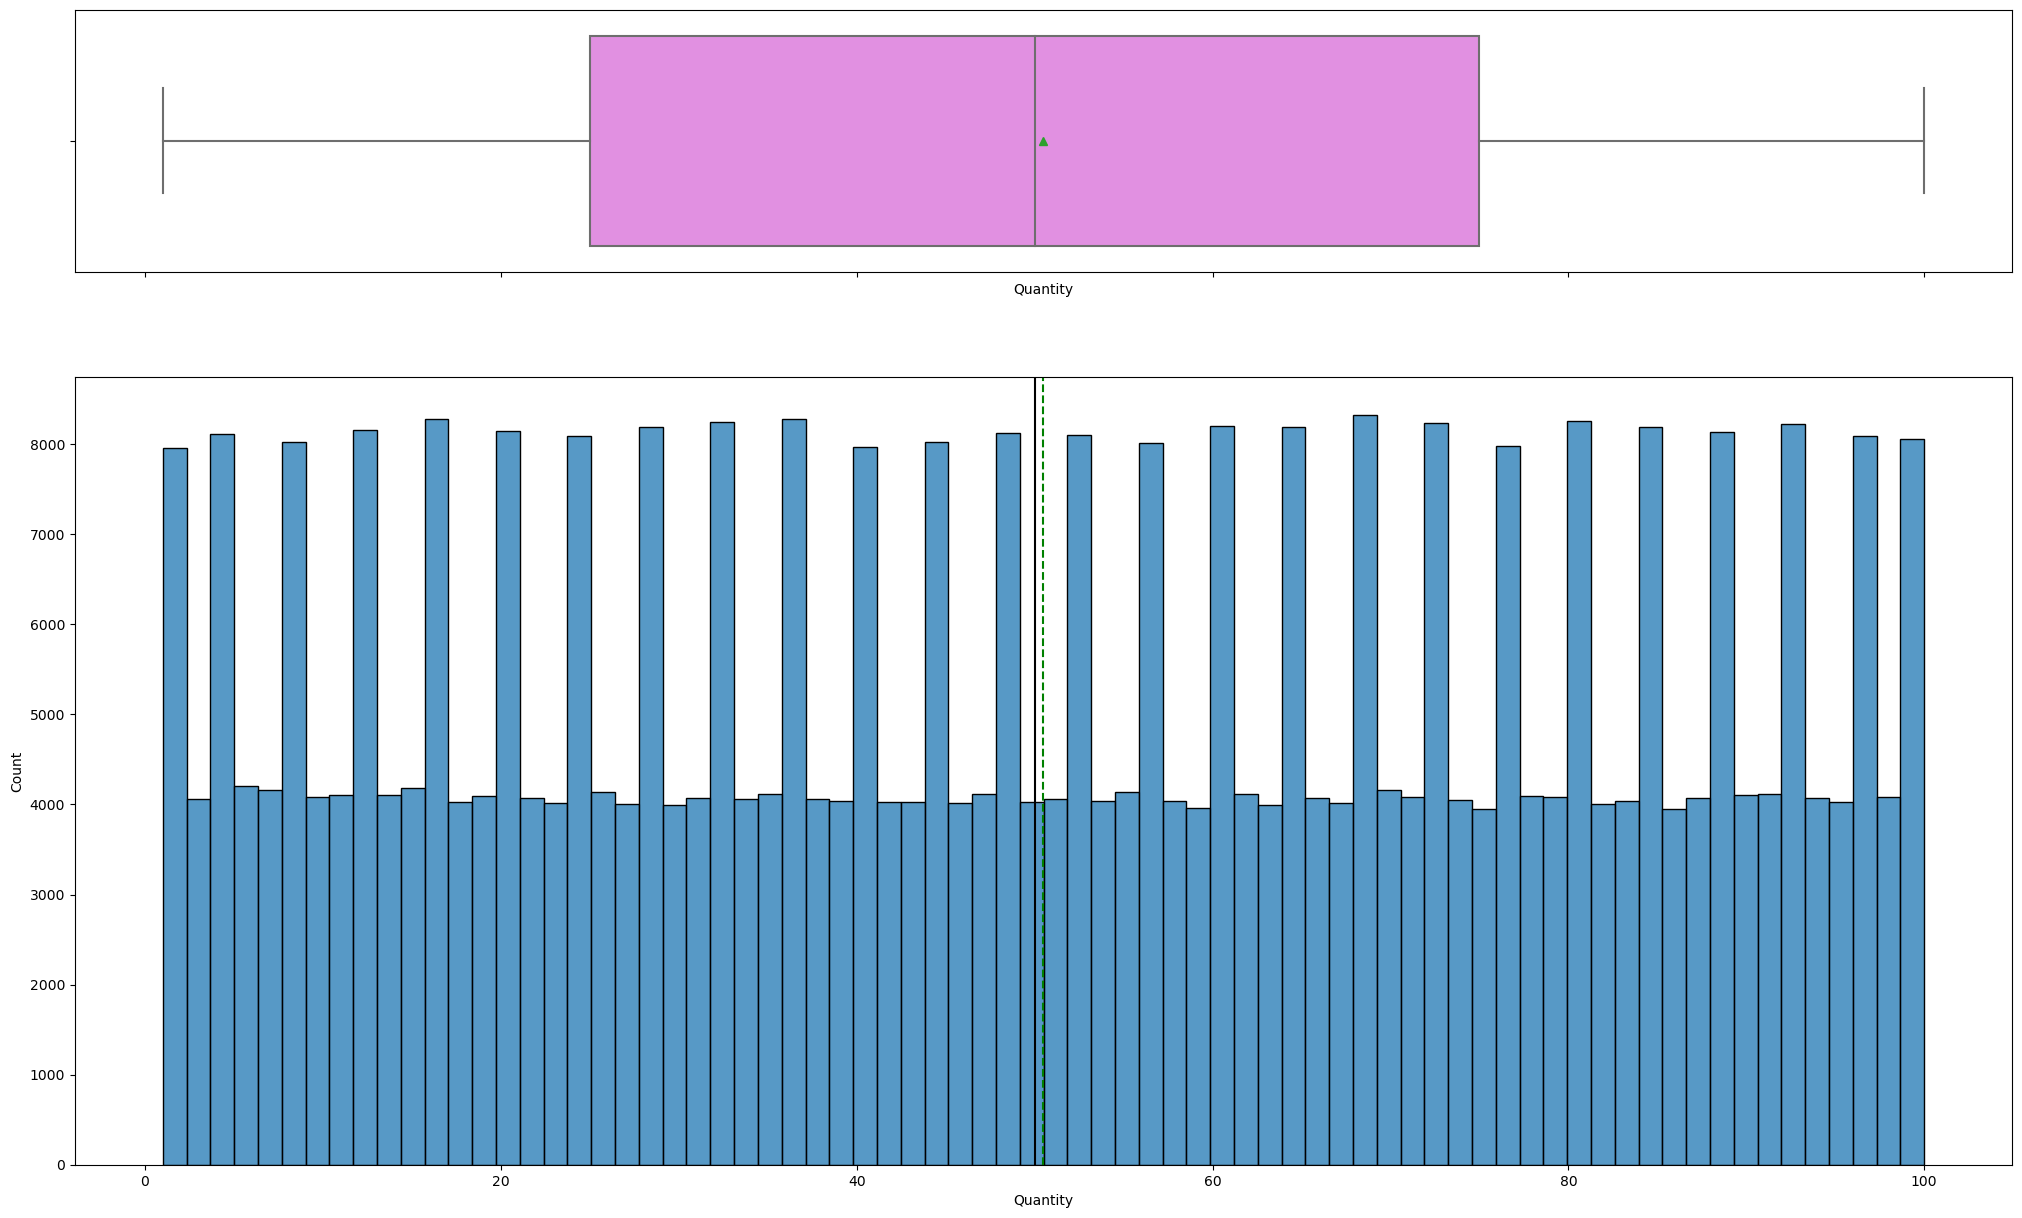

In [69]:
histogram_boxplot(data['Quantity'])

### Observation

The quantity is almost equally distributed across Countries

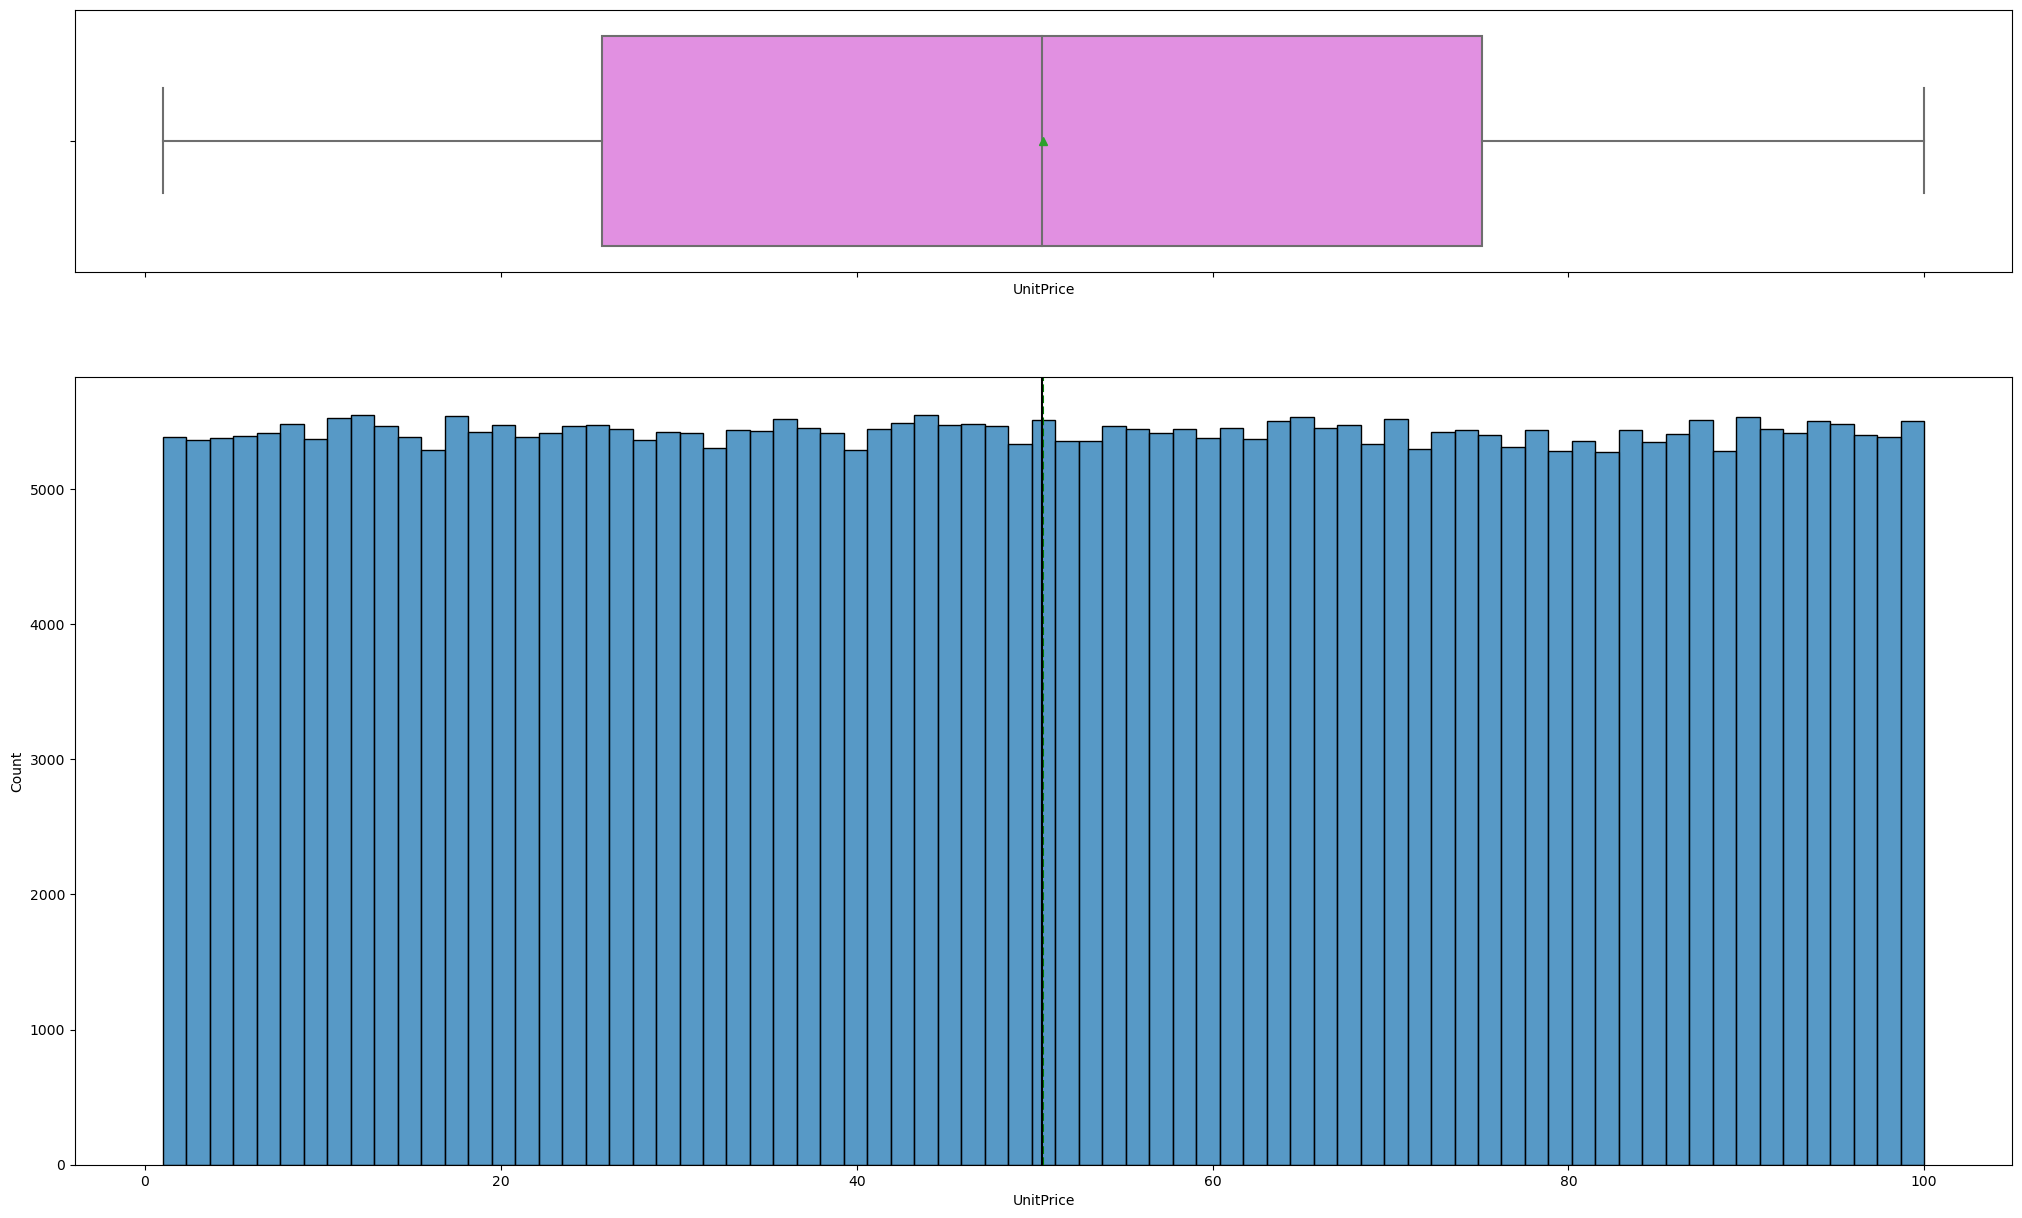

In [70]:
histogram_boxplot(data['UnitPrice'])

### Observation

The unit price of goods is uniformly distributed across Countries

* InvoiceNo, StockCode, Description, Country are objects. They can be changed to categopries

### Bivariate Analysis of numerical Variables

C:\Users\omats\AppData\Local\Temp\ipykernel_26388\1293431548.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, vmin=-1, vmax=1,fmt='.1g')


<Axes: >

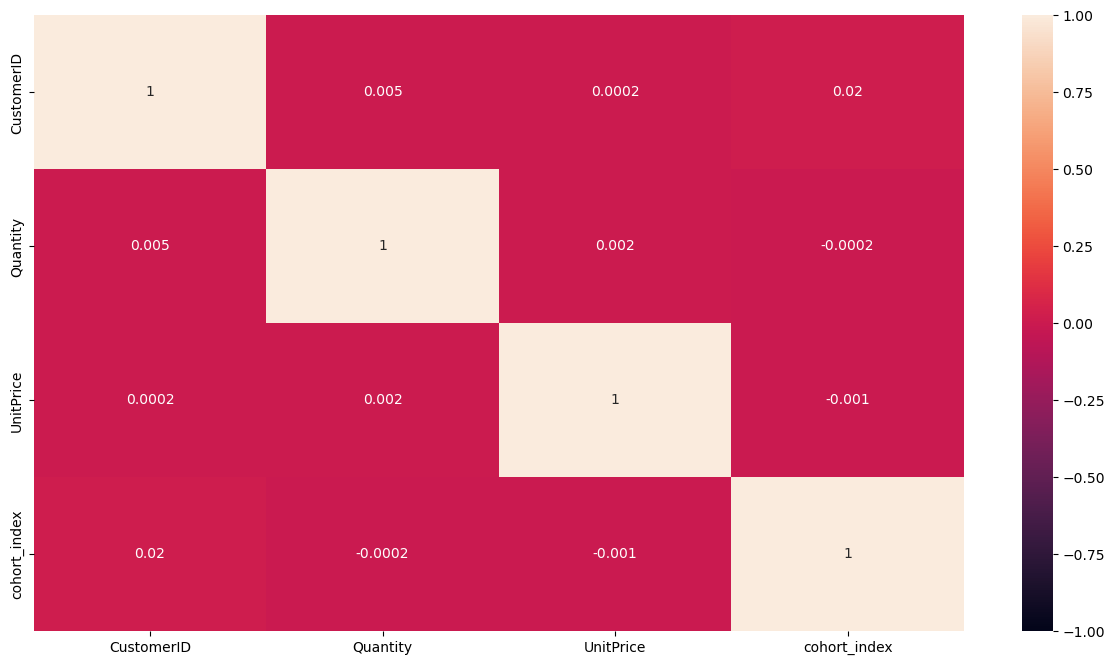

In [71]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True, vmin=-1, vmax=1,fmt='.1g')

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#Define churn (e.g., customer with no activity after a specific period)
data['IsChurned'] = data['cohort_index'].apply(lambda x: 1 if x >= 6 else 0) #Example threshold

# Aggregate customer-level data
customer_data = data.groupby('CustomerID').agg({
    'InvoiceDate': 'max',
    'cohort_index': 'max',
    'IsChurned': 'max'
}).reset_index()
#Train test split
X = customer_data[['cohort_index']] # use more features as needed
y = customer_data['IsChurned']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Train a model

model = RandomForestClassifier()
model.fit(X_train, y_train)

#Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       468
           1       1.00      1.00      1.00       407

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



### Explanation

1. Precision:
    Precision= 1.00 for each classes indicates that when the model predicts a class (0 or1), it is correct 100% of the time

    2. Recall:
        Recall= 1.00 for both classes means the model correctly identifies all instances of both class 0 and class 1
    
    3. F1-Score
    F1 = 1.00 for both classes indicates perfect balance between precision and recall
    
    4. Support: The number of instances of each class in the dataset. Class o has 468 samples, and class 1 has 407 samples.
   

The above model show the model is performing perfectly on the given dataset with an accuracy, precision, recall, and F1-score of 1.00 for both classes.

This could mean the model is well_trained and captures all patterns in the data
   

### Observation

The classificationn report relates to churn in the following ways:

Churn Prediction
Class 0: Likely represents customers who did not curn. Class 1: Likely represent customers who churned. The model predicts both categories perfectrly.
meaning it is identifying all churned and non-churned customers without any errors. 

Implication for churn Analysis:
High Precision for class1 (Churned Customers): Every customer predicted as "Churned" is indeed a churned customer. This is critical for reducing false alarms
(customers flagged incorrectly as churned). High Recall for class 1 (Churned Customer): The model identifies all churned customers correctly.
This ensures no churned goes unnoticed, which is crucial for retention strategies. High F1-Score for class 1: This indicates a perfect balance between precision and recall for churn prediction.
    
What it means for retention strategies   
Since the model predicts churn perfectly, it can be a powerful tool to identify at-risk customers. With these predictions, you can implement personalized strategies
(e.g. offers, intervention) to retain churn-prone customers

### Segmentation Analysis

Customer segmentation is the process of diving a broad customer base into groups or segments based on shared characteristics. The goal is to target each segment with tailored marketing strategies to improve engagement and conversions.

In [76]:
data.shape

(406829, 12)

### Exploratory Data Analysis

In [77]:
data.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode', 'Description',
       'Quantity', 'UnitPrice', 'Country', 'cohort date', 'cohort_index',
       'isChurned', 'IsChurned'],
      dtype='object')

In [78]:
{x: len(data[x].unique()) for x in data.columns}

{'InvoiceNo': 22190,
 'InvoiceDate': 13,
 'CustomerID': 4372,
 'StockCode': 9000,
 'Description': 10,
 'Quantity': 100,
 'UnitPrice': 9901,
 'Country': 28,
 'cohort date': 13,
 'cohort_index': 13,
 'isChurned': 2,
 'IsChurned': 2}

In [79]:
data.describe()

,CustomerID,Quantity,UnitPrice,cohort_index,isChurned,IsChurned
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,15287.690570,50.478471,50.477654,5.185088,0.435065,0.435065
std,1713.600303,28.872921,28.573075,3.859473,0.495766,0.495766
min,12346.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,13953.000000,25.000000,25.710000,1.000000,0.000000,0.000000
50%,15152.000000,50.000000,50.430000,4.000000,0.000000,0.000000
75%,16791.000000,75.000000,75.170000,8.000000,1.000000,1.000000
max,18287.000000,100.000000,100.000000,13.000000,1.000000,1.000000


### RFM Distribution

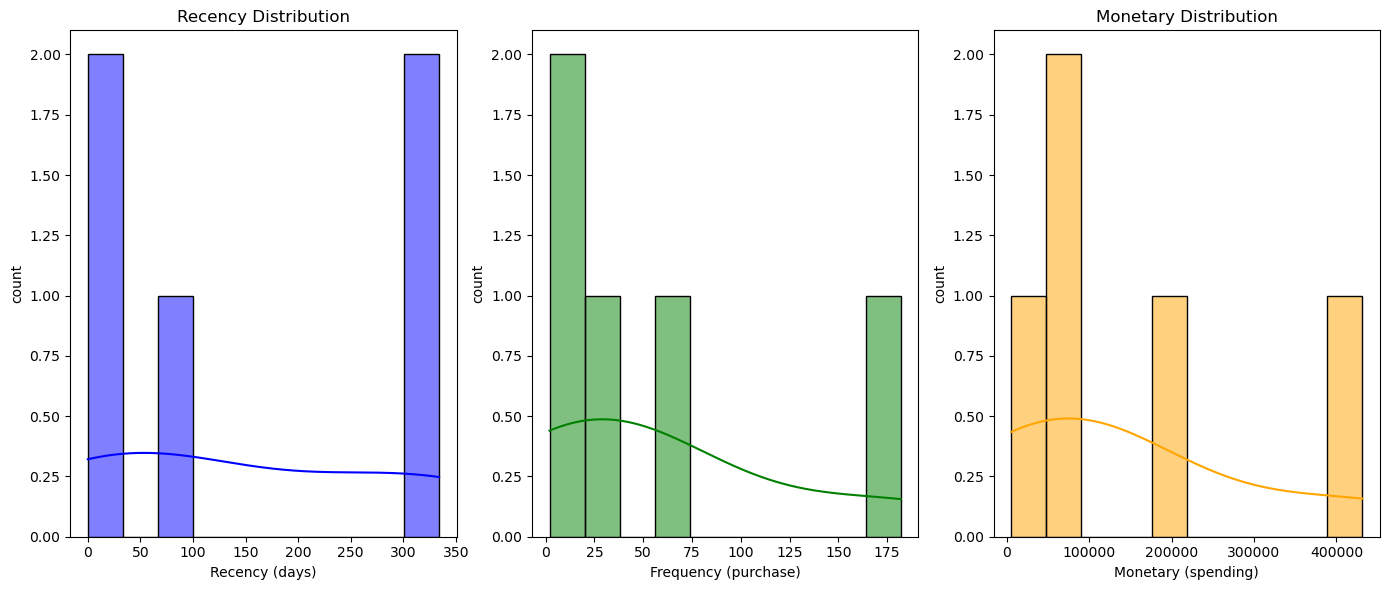

In [81]:
# Sample RFM data
rfm_data = {
    'CustomerID': [12346.0, 12347.0, 12348.0, 12349.0, 12350.0],
    'Recency': [334, 0, 91, 30, 303],
    'Frequency': [2, 182, 31, 73, 17],
    'Monetary': [5342.40, 431501.00, 82378.47, 176075.12, 48173.37]
}
rfm = pd.DataFrame(rfm_data)

# plot RFM Distribution
plt.figure(figsize=(14,6))

# Subplot 1: Recency Distribution
plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins=10, kde=True, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('count')

# Subplot 2: Frequency Distribution
plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=10, kde=True, color='green')
plt.xlabel('Frequency (purchase)')
plt.ylabel('count')

# Subplot 3: Monetary Distribution
plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins=10, kde=True, color='orange')
plt.title('Monetary Distribution')
plt.xlabel('Monetary (spending)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

### Recency Distribution:
What it shows: The distribution of the number of days since customers' last purchase

### Key insights:
A peak at low Recency values (e.g, near 0) indicates that many customers recenctly made purchases, suggesting active customer engagement. A l;ong tail toward high Recency values( e.g. >300) indicates inactive customers who haven't purchased in a long time.

### Frequency Distribution:
What it shows: The number of purchases per customer.

### Key Insights:
A high concentration at low Frequency values suggest many customers are one-time buyers. A smaller group of customers makes frequent purchases. Indicating potential loyal customers.

### Monetary Distribution:
What it shows: The total spending by customers.

### Key insights:
Most customers have low monetary values, meaning they spend modestly. A few customers contribute significantly, highlighting high-value customers (e.g. VIPs)

### Frequency vs Monetary Scatter plot(with Recency)

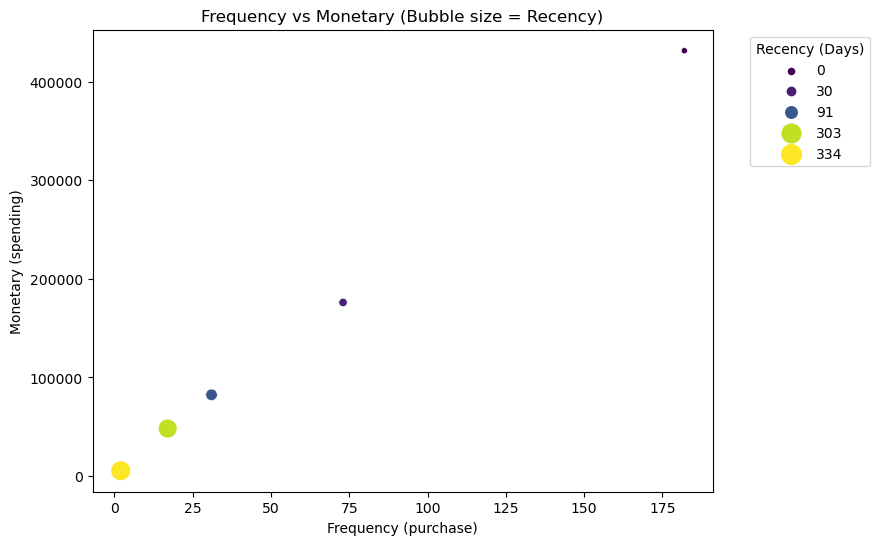

In [82]:
# scatter plot: Frequency vs Monetary
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', size='Recency', hue='Recency', palette='viridis', sizes=(20, 200))
plt.title('Frequency vs Monetary (Bubble size = Recency)')
plt.xlabel('Frequency (purchase)')
plt.ylabel('Monetary (spending)')
plt.legend(title='Recency (Days)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Explanation
The relationship between how often customers purchase (Frequency) and how much they spend (Monetary), with the size and color of the bubbles representing how recently they made a purchase.

### Key insights
#### High Frequency, High Monetary, Low Recency:
Customers in this group are frequent, high spenders who recently purchased. 
#### Action: Reward their loyalty with exclusive offers or priority services.

#### Low Frequency, High Monetary, High Recency:
Customers here spend a lot but haven't purchased recently.

#### Action:
Re-engage with target with target marketing campaigns or special discounts to bring them back.

#### Low Frequency, Low Monetary, High Recency:
These are recent but low_value customers

####Action: Focus on nurturing them to encourage repeat purchases and increase threir spending.

#### High Frequency, Low Monetary, Low Recency:
Customers in this group purchase frequently but spend little per transaction.
#### Action: Offer product bundles or upsell higher-value items

In [87]:
# Create a reference date for recency calculation (e.g, the recent date in the dataset)
reference_date = data['InvoiceDate'].max()

# Calculate RFM metrics
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days, # Recency: Days since last purchase
    'InvoiceNo': 'count',                           # Frequency:Total number of purchases
    'Quantity': lambda x: (x*data.loc[x.index, 'UnitPrice']).sum() # Monetary: Total spending
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Quantity': 'Monetary'
})
# Display the first few rows of the RFM table
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,334,2,5342.40
12347.0,0,182,431501.00
12348.0,91,31,82378.47
12349.0,30,73,176075.12
12350.0,303,17,48173.37


### Explanation RFM

1. RECENCY
The number of days since the customer's last purchase relative to a reference date. Example: Customer 12347.0 has aRecency of 0, meaning they made a purchase on the most recent transaction date. Customer 12346.0 has a Recency of 334, indicating they haven't made a purchase in 334 days, so they are less recent.

2. Frequency:
    The trotal number of purchases made by the customer. Example: Customer 12347.0 made 182 purchases, indicarting they are a frequent buyer. Customer 12350.0 made 17 purchases, showing they are less frequent.

3. Monetary:
    The total monetary value of the customer's purchases. Example:Customer 12347.0 spent #431,501.00, making them a high-value customer. customer 1235.0 spent #48,173.37, making them a moderate spender.

### Insights from the Data:

### !. Customer Segmentation:
High-value, loyal Customer: Example:Customer 12347.0: Recent purchase (Recovery:0). High purchase frquency (Frequency:182). Significant spending (Monetary:#431,501.00). At Risk Customer: Example: Customer 12346.0: Long time since the last purchase(Recency:334). Low purchase frequency(Frequency:2).Moderate spending(Monetary:#5,342.40).

### 2. Retention and Marketing Efforts:
Customers with low recency(e.g. 12347.0) should be rewarded with loyalty perks or cross-sell opportunities. Customers with high Recency(e.g. 12346.0) need re-engagement campaigns, such as special offers or reminders.

### 3. Business Strategy:
prioritize high-frequency, high-Monetary customers for personalized campaigns. Analyze low-frequency customers to understand why they churned or reduced engagement.